In [166]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [167]:
vehicles_df = pd.read_csv('vehicles_dataset3.csv', index_col=0)
vehicles_df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442.0,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17 16:30:50+00:00,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,gas,60023.0,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03 19:40:21+00:00,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048.0,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28 10:52:20+00:00,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291.0,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17 14:08:57+00:00,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000.0,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03 22:32:06+00:00,medium


In [168]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            10000 non-null  int64  
 6   manufacturer    9618 non-null   object 
 7   model           10000 non-null  object 
 8   fuel            10000 non-null  object 
 9   odometer        10000 non-null  float64
 10  title_status    10000 non-null  object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             10000 non-null  float64
 16  long            10000 non-null  float64
 17  posting_date    9998 non-null   objec

In [169]:
vehicles_df = vehicles_df[~vehicles_df.manufacturer.isna()].reset_index(drop=True)
vehicles_df['transmission'] = vehicles_df['transmission'].fillna(vehicles_df['transmission'].mode()[0])
vehicles_df['posting_date'] = pd.to_datetime(vehicles_df['posting_date'])
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9618 non-null   int64              
 1   url             9618 non-null   object             
 2   region          9618 non-null   object             
 3   region_url      9618 non-null   object             
 4   price           9618 non-null   int64              
 5   year            9618 non-null   int64              
 6   manufacturer    9618 non-null   object             
 7   model           9618 non-null   object             
 8   fuel            9618 non-null   object             
 9   odometer        9618 non-null   float64            
 10  title_status    9618 non-null   object             
 11  transmission    9618 non-null   object             
 12  image_url       9618 non-null   object             
 13  description     9618 non-null   o

In [170]:
# Генерация новых признаков из стоковых переменных
# vehicles_df['full_model'] = vehicles_df.manufacturer.str.lower() + ' ' + vehicles_df.model.str.lower()
vehicles_df['model_in_desc'] = vehicles_df.apply(lambda x: x.description.count(x.model), axis=1)
vehicles_df.model_in_desc.value_counts()

model_in_desc
0     8549
1      766
2       95
3       42
5       31
4       23
9       14
7       11
8       10
28       9
6        7
15       5
14       5
20       5
16       4
11       3
23       3
25       3
31       3
27       3
22       3
29       2
19       2
13       2
17       2
10       2
35       2
18       2
63       1
26       1
54       1
34       1
32       1
56       1
49       1
30       1
36       1
12       1
Name: count, dtype: int64

In [171]:
vehicles_df['desc_chars'] = vehicles_df.description.str.len()
vehicles_df['desc_chars']

0       4482
1        968
2       4286
3       3241
4        538
        ... 
9613    1710
9614     948
9615     909
9616    3644
9617    4483
Name: desc_chars, Length: 9618, dtype: int64

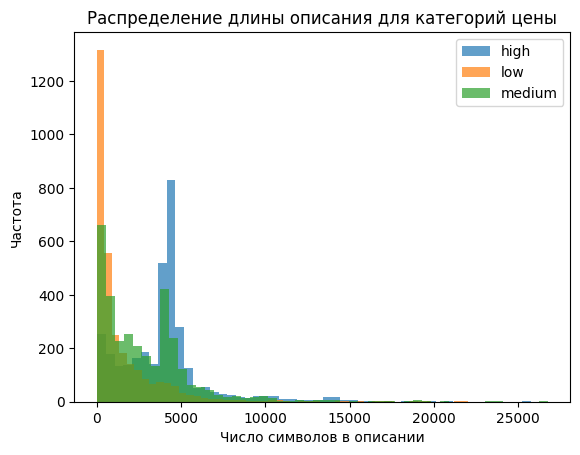

In [172]:
vehicles_df.groupby('price_category').desc_chars.plot.hist(bins=50, alpha=0.7)
plt.xlabel('Число символов в описании')
plt.ylabel('Частота')
plt.title('Распределение длины описания для категорий цены')
plt.legend();

In [173]:
# Нормализация числовых признаков
scaler = StandardScaler()
vehicles_df.select_dtypes(include=['int', 'float'])

,id,price,year,odometer,lat,long,model_in_desc,desc_chars
0,7308295377,54990,2020,27442.0,35.060000,-85.250000,0,4482
1,7316380095,16942,2016,60023.0,40.821805,-74.061962,0,968
2,7313733749,35590,2017,14048.0,33.779214,-84.411811,0,4286
3,7308210929,14500,2013,117291.0,35.715954,-78.655304,0,3241
4,7316474668,21800,2021,8000.0,40.654800,-73.609700,0,538
...,...,...,...,...,...,...,...,...
9613,7304876387,4495,2002,150000.0,42.123900,-79.189500,0,1710
9614,7316152972,14495,2008,113573.0,43.216990,-77.755610,0,948
9615,7310993818,8995,2011,150184.0,44.925908,-122.982753,0,909
9616,7306637427,31900,2015,61943.0,43.029559,-89.397796,0,3644


In [175]:
scaled_nv = scaler.fit_transform(vehicles_df.select_dtypes(include=['int', 'float']))
scaled_nv

array([[-0.74857332,  2.66790909,  1.281923  , ...,  0.4961618 ,
        -0.14947095,  0.60073475],
       [ 1.10915393, -0.14362938,  0.65597882, ...,  1.11536962,
        -0.14947095, -0.66730208],
       [ 0.50106975,  1.23435552,  0.81246487, ...,  0.54255181,
        -0.14947095,  0.5300076 ],
       ...,
       [-0.12851862, -0.73086908, -0.1264514 , ..., -1.59217717,
        -0.14947095, -0.6885924 ],
       [-1.12954132,  0.96168476,  0.49949278, ...,  0.26659986,
        -0.14947095,  0.29834008],
       [ 0.09366848,  0.96833527,  0.81246487, ...,  0.99150423,
        -0.14947095,  0.60109561]])

In [176]:
vehicles_df[vehicles_df.select_dtypes(include=['int', 'float']).columns] = scaled_nv
vehicles_df.describe()

,id,price,year,odometer,lat,long,model_in_desc,desc_chars
count,9.618000e+03,9.618000e+03,9.618000e+03,9.618000e+03,9.618000e+03,9.618000e+03,9.618000e+03,9.618000e+03
mean,2.620173e-14,-5.319097e-17,5.914541e-15,-1.218960e-17,-1.002502e-15,2.068538e-17,-2.437920e-17,-6.113268e-17
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.288380e+00,-1.358603e+00,-2.786714e+00,-1.494148e+00,-1.814938e+01,-3.534060e+00,-1.494710e-01,-1.015164e+00
25%,-7.734001e-01,-8.117836e-01,-5.959095e-01,-8.626116e-01,-6.306605e-01,-7.948124e-01,-1.494710e-01,-8.224688e-01
50%,2.762925e-01,-2.303446e-01,1.865207e-01,-6.700850e-02,1.001355e-01,3.310129e-01,-1.494710e-01,-2.075756e-01
75%,8.546304e-01,6.727572e-01,8.124649e-01,6.937406e-01,6.535929e-01,7.295317e-01,-1.494710e-01,5.263089e-01
max,1.272279e+00,2.899568e+00,1.594895e+00,3.037417e+00,4.501178e+00,1.483815e+01,2.724603e+01,8.645949e+00


In [177]:
# Кодирование категориальных признаков
vehicles_df.select_dtypes(exclude=vehicles_df.posting_date.dtype).describe(exclude=['int', 'float'])

,url,region,region_url,manufacturer,model,fuel,title_status,transmission,image_url,description,state,price_category
count,9618,9618,9618,9618,9618,9618,9618,9618,9618,9618,9618,9618
unique,9618,392,404,39,3187,5,6,3,8738,9481,51,3
top,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,ford,f-150,gas,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,high
freq,1,84,84,1638,151,8193,9316,7467,179,5,1065,3342


In [178]:
# Кодируем one-hot следующие признаки, так как они содержат малое количество уникальных значений
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(vehicles_df[['fuel', 'title_status', 'transmission', 'price_category']]).astype(int)
encoded

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [179]:
ohe.get_feature_names_out()

array(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other', 'title_status_clean', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_automatic', 'transmission_manual',
       'transmission_other', 'price_category_high', 'price_category_low',
       'price_category_medium'], dtype=object)

In [180]:
vehicles_df[ohe.get_feature_names_out()] = encoded
vehicles_df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,model_in_desc,desc_chars,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,price_category_high,price_category_low,price_category_medium
0,-0.748573,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,2.667909,1.281923,ram,2500 crew cab big horn,diesel,-1.055454,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,-0.609242,0.496162,2021-04-17 16:30:50+00:00,high,-0.149471,0.600735,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,1.109154,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,-0.143629,0.655979,ford,explorer 4wd 4dr xlt,gas,-0.534606,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,0.379590,1.115370,2021-05-03 19:40:21+00:00,medium,-0.149471,-0.667302,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0.501070,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,1.234356,0.812465,volkswagen,golf r hatchback,gas,-1.269573,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,-0.829049,0.542552,2021-04-28 10:52:20+00:00,high,-0.149471,0.530008,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,-0.767978,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,-0.324080,0.186521,toyota,rav4,gas,0.380894,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,-0.496669,0.861149,2021-04-17 14:08:57+00:00,medium,-0.149471,0.152916,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1.130885,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,0.215350,1.438409,nissan,altima,gas,-1.366258,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,0.350929,1.140400,2021-05-03 22:32:06+00:00,medium,-0.149471,-0.822469,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,-1.534198,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,-1.063394,-1.534826,toyota,rav4,gas,0.903788,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,0.603053,0.831583,2021-04-10 20:33:57+00:00,low,-0.149471,-0.399549,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
9614,1.056965,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,-0.324449,-0.595910,jeep,wrangler,gas,0.321457,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,0.790648,0.910943,2021-05-03 13:36:30+00:00,medium,-0.149471,-0.674519,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
9615,-0.128519,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,-0.730869,-0.126451,audi,a3 2.0t premium plus pzev,gas,0.906729,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,1.083930,-1.592177,2021-04-22 19:14:01+00:00,low,-0.149471,-0.688592,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
9616,-1.129541,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,0.961685,0.499493,porsche,cayenne,hybrid,-0.503912,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,0.758481,0.266600,2021-04-14 1

In [181]:
# Временные переменные (даты)
vehicles_df['posting_day'] = vehicles_df['posting_date'].dt.day
vehicles_df['posting_month'] = vehicles_df['posting_date'].dt.month
vehicles_df['posting_year'] = vehicles_df['posting_date'].dt.year
vehicles_df[vehicles_df.columns[vehicles_df.columns.str.startswith('posting') & (vehicles_df.columns != 'posting_date')]]

,posting_day,posting_month,posting_year
0,17,4,2021
1,3,5,2021
2,28,4,2021
3,17,4,2021
4,3,5,2021
...,...,...,...
9613,10,4,2021
9614,3,5,2021
9615,22,4,2021
9616,14,4,2021


In [182]:
vehicles_df[vehicles_df.columns[vehicles_df.columns.str.startswith('posting') & (vehicles_df.columns != 'posting_date')]].astype(str).describe()

,posting_day,posting_month,posting_year
count,9618,9618,9618
unique,30,2,1
top,4,4,2021
freq,877,6999,9618


In [183]:
# Так как год один и тот же, его можно не учитывать, 
# а так как месяцев два, то можно оставить столбе из единиц и нулей, т. е. равен месяц 4 или нет
vehicles_df = vehicles_df.drop('posting_year', axis=1)
vehicles_df['posting_month'] = (vehicles_df['posting_month'] == 4).astype(int)
vehicles_df['posting_month']

0       1
1       0
2       1
3       1
4       0
       ..
9613    1
9614    0
9615    1
9616    1
9617    1
Name: posting_month, Length: 9618, dtype: int32

In [184]:
vehicles_df['posting_day']

0       17
1        3
2       28
3       17
4        3
        ..
9613    10
9614     3
9615    22
9616    14
9617    24
Name: posting_day, Length: 9618, dtype: int32

In [188]:
scaler_day = StandardScaler()
vehicles_df['posting_day'] = scaler_day.fit_transform(vehicles_df[['posting_day']])
vehicles_df['posting_day']

0       0.166216
1      -1.217308
2       1.253270
3       0.166216
4      -1.217308
          ...   
9613   -0.525546
9614   -1.217308
9615    0.660331
9616   -0.130254
9617    0.857978
Name: posting_day, Length: 9618, dtype: float64

In [189]:
vehicles_df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,model_in_desc,desc_chars,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,price_category_high,price_category_low,price_category_medium,posting_day,posting_month
0,-0.748573,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,2.667909,1.281923,ram,2500 crew cab big horn,diesel,-1.055454,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,-0.609242,0.496162,2021-04-17 16:30:50+00:00,high,-0.149471,0.600735,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0.166216,1
1,1.109154,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,-0.143629,0.655979,ford,explorer 4wd 4dr xlt,gas,-0.534606,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,0.379590,1.115370,2021-05-03 19:40:21+00:00,medium,-0.149471,-0.667302,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,-1.217308,0
2,0.501070,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,1.234356,0.812465,volkswagen,golf r hatchback,gas,-1.269573,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,-0.829049,0.542552,2021-04-28 10:52:20+00:00,high,-0.149471,0.530008,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1.253270,1
3,-0.767978,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,-0.324080,0.186521,toyota,rav4,gas,0.380894,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,-0.496669,0.861149,2021-04-17 14:08:57+00:00,medium,-0.149471,0.152916,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.166216,1
4,1.130885,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,0.215350,1.438409,nissan,altima,gas,-1.366258,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,0.350929,1.140400,2021-05-03 22:32:06+00:00,medium,-0.149471,-0.822469,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,-1.217308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9613,-1.534198,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,-1.063394,-1.534826,toyota,rav4,gas,0.903788,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,0.603053,0.831583,2021-04-10 20:33:57+00:00,low,-0.149471,-0.399549,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.525546,1
9614,1.056965,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,-0.324449,-0.595910,jeep,wrangler,gas,0.321457,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,0.790648,0.910943,2021-05-03 13:36:30+00:00,medium,-0.149471,-0.674519,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,-1.217308,0
9615,-0.128519,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,-0.730869,-0.126451,audi,a3 2.0t premium plus pzev,gas,0.906729,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,1.083930,-1.592177,2021-04-22 19:14:01+00:00,low,-0.149471,-0.688592,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.660331,1
9616,-1.129541,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,0.961685,0.499493,porsche,cayenne,hybrid,-0.503912,clean,automatic,https://i